## Final Project Submission

Please fill out:
* Student name: Sue Lim
* Student pace: self paced
* Scheduled project review date/time: Fri, Feb 17, 2023, 11:30 AM - 12:15 PM
* Instructor name: Mark Barbour
* Blog post URL: https://medium.com/@limsue9123/which-movie-to-create-for-your-new-business-7bb1440cd7e6

# Which Movie to Create?
## I. Introduction
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. I am charged with exploring what types of films are currently doing the best at the box office. I must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

In [1]:
# Import relevant libraries and set options

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('float_format', '{:,.0f}'.format)

In [18]:
# Import raw data files

budget_gross = pd.read_csv("zippedData/tn.movie_budgets.csv")
genre = pd.read_csv("zippedData/imdb.title.basics.csv")
gross_studio = pd.read_csv("zippedData/bom.movie_gross.csv")
people = pd.read_csv("zippedData/imdb.title.principals.csv")
people_names = pd.read_csv("zippedData/imdb.name.basics.csv")
# ratings = pd.read_csv("zippedData/tmdb.movies.csv", index_col = 0)

## II. Analysis Overview
To determine which type of movies to create for the new business, I explore which genres were linked to the greatest gross revenue. I use gross revenue because it is an objective indicator of popularity, and it is crucial for the new business to create high-impact popular movies that would boost its reputation, enabling its subsequent movies to receive attention. For this reason, I prioritize gross revenue over profit.

Once I determine which genre of movies to produce, I investigate which actors/actresses or directors are associated with the greatest average gross revenue. This is to offer preliminary guidance on whom to hire for the new movies.

Finally, I analyze the relationship between the runtime and gross revenue, and identify the optimal range of runtime for a movie.

## III. Data
[Box Office Mojo](https://www.boxofficemojo.com/) provides gross revenue information for movies.

In [69]:
# Gross revenue data 1

gross_studio

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,"415,000,000",652000000,2010,"1,067,000,000"
1,Alice in Wonderland (2010),BV,"334,200,000",691300000,2010,"1,025,500,000"
2,Harry Potter and the Deathly Hallows Part 1,WB,"296,000,000",664300000,2010,"960,300,000"
3,Inception,WB,"292,600,000",535700000,2010,"828,300,000"
4,Shrek Forever After,P/DW,"238,700,000",513900000,2010,"752,600,000"
...,...,...,...,...,...,...
3382,The Quake,Magn.,"6,200",NaN,2018,"6,200"
3383,Edward II (2018 re-release),FM,"4,800",NaN,2018,"4,800"
3384,El Pacto,Sony,"2,500",NaN,2018,"2,500"
3385,The Swan,Synergetic,"2,400",NaN,2018,"2,400"


However, the list is not comprehensive, and there is another data source that [The Numbers](https://www.the-numbers.com/) provides.

In [6]:
# Gross revenue data 2

budget_gross

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


[IMDB](https://www.imdb.com/) provides genre and runtime information on movies.

In [13]:
# Dataset containing genre information

genre

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,nan,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,nan,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116,NaN


IMDB also offers data on people associated with each movie.

In [16]:
# Dataset on people associated with each movie

people

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN


However, the list above does not have the persons' actual names, so I use the dataset below from IMDB to identify the names.

In [20]:
# Mapping between "nconst" and actual names

people_names

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,nan,nan,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,nan,nan,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,nan,nan,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,nan,nan,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,nan,nan,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,nan,nan,actress,NaN
606644,nm9990690,Joo Yeon So,nan,nan,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,nan,nan,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,nan,nan,producer,NaN


## IV. Process Steps

I combine the datasets introduced above to use it for different analyses. As the first step, I stack the two gross revenue datasets and calculate the total gross for a movie. Then, I merge it in the genre dataset. This will be the first final dataset.

In [21]:
# Stack two datasets containing gross revenue figures for movies, 
# after calculating the total gross revenue and deriving release years

gross_studio["total_gross"] = gross_studio["domestic_gross"].fillna(0) + pd.to_numeric(gross_studio["foreign_gross"].str.replace(",", "")).fillna(0)
gross_studio.groupby("studio")["total_gross"].mean().sort_values(ascending = False)

budget_gross[["worldwide_gross", "domestic_gross"]] = budget_gross[["worldwide_gross", "domestic_gross"]].apply(lambda x: pd.to_numeric(x.str.replace("[$,]", "")), axis = 1)
budget_gross["total_gross"] = budget_gross["worldwide_gross"]
budget_gross["year"] = pd.to_numeric(budget_gross["release_date"].apply(lambda x: x[-4:]))

gross = pd.concat([gross_studio, budget_gross.rename(columns = {"movie": "title"})])
gross = gross.sort_values(by = "total_gross")
gross = gross.drop_duplicates(subset = "title", keep = "first")

In [22]:
# Merge the dataset containing genres for movies and the stacked gross revenue dataset

merged = genre.merge(gross, left_on = ["primary_title", "start_year"], right_on = ["title", "year"], how = "inner")

The second final dataset will be the first final dataset with the genre variable split into multiple variables. Often, movies are associated with multiple genres and I split them to be able to analyze the movies by unique genre.

In [23]:
# As there can be more than one genre for a movie, split the genre field into multiple variables,
# and make the merged dataset wide to long

merged[["genre_1", "genre_2", "genre_3"]] = merged["genres"].str.split(",", expand=True)
merged0 = pd.melt(merged, id_vars = list(merged.columns[:-3]), value_vars = ["genre_1", "genre_2", "genre_3"])
merged1 = merged0.dropna(subset = ["value"])

The third final dataset is the dataset that maps between people associated with a movie to the movie's genre, gross revenue, etc.

In [24]:
# Next, to explore directors and actors/actresses, 
# merge the main dataset with a dataset mapping between movies and people associated with them

people_names0 = people.merge(people_names[["nconst", "primary_name"]], on = "nconst") # Identify names for people listed in the mapping
merged2 = merged.merge(people_names0, on = "tconst", how = "inner")

The following is a custom function for generating a bar chart.

In [25]:
# Barplot function

def bplot(var1, var2, title, xlabel, ylabel):
    fig, ax = plt.subplots(figsize = [10, 5])
    sns.barplot(x = var1, y = var2, data = chart_data, ax = ax)
    ax.yaxis.set_major_formatter('${x:,.0f}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

## V. Results

To begin with, below shows the average gross revenue by unique movie genre. We can see that Animation, Sci-Fi, and Adventure are the top 3 movies with the biggest revenue, close to $300M. Therefore, we want to pay attention to them.

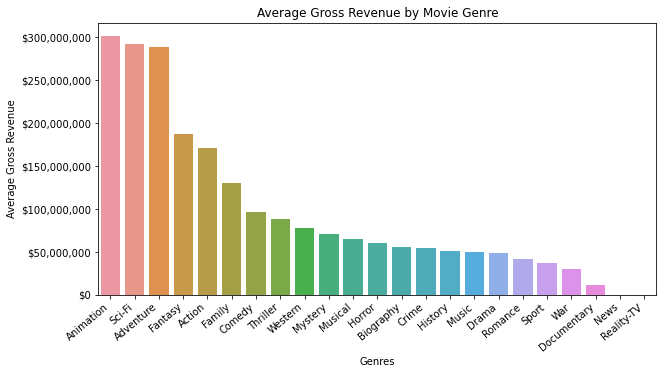

In [26]:
# Calculate and plot average gross revenue by movie genre

chart_data = merged1.groupby("value")["total_gross"].agg({"size", "mean"}).sort_values(by = "mean", ascending = False).reset_index()

bplot("value", "mean", "Average Gross Revenue by Movie Genre", "Genres", "Average Gross Revenue")

However, we already know that many movies are associated with multiple genres. Is a movie more likely to succeed when it has more unique genres? Yes, it is seen below that gross revenue tends to be bigger for multi-genre movies.

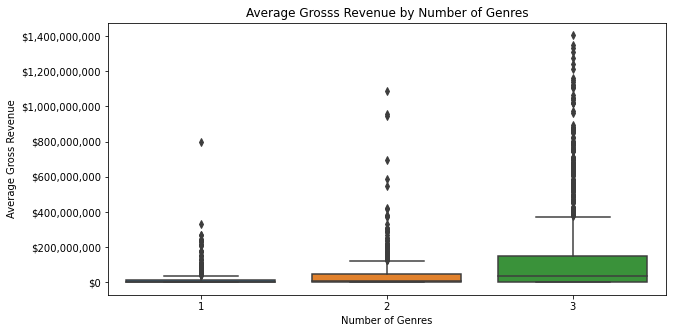

In [27]:
# Calculate and plot average gross revenue by number of genres

merged["num_genres"] = merged["genres"].str.count(",").fillna(0)+1

fig, ax = plt.subplots(figsize = [10, 5])
sns.boxplot(x = "num_genres", y = "total_gross", data = merged, ax = ax)
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.xaxis.set_major_formatter('{x:,.0f}')
ax.set_title("Grosss Revenue by Number of Genres")
ax.set_xlabel("Number of Genres")
ax.set_xticklabels([1, 2, 3])
ax.set_ylabel("Average Gross Revenue")
plt.show()

More numerically, the average gross revenue for a single-genre movie is \\$26M, and average gross revenue for a movie with two genres is \\$47M. Lastly, the average gross revenue for multi-genre movies is much higher, reaching approximately \\$132M.  

In [35]:
# Show average gross revenue by number of unique genres in a table

table_data = merged.groupby("num_genres")["total_gross"].mean().reset_index()
table_data.columns = ["Number of Genres", "Average Gross Revenue"]
table_data

,Number of Genres,Average Gross Revenue
0,1,"26,115,463"
1,2,"46,557,601"
2,3,"132,475,218"


Therefore, it is advisable to invest in a movie that is associated with multiple genres. Then, which combination of genres is most lucrative? Below, we can see that "Adventure, Fantasy" yielded approximately \\$700M on average. However, there are only three data points. The next one with more data points is "Action, Adventure, Sci-Fi" with an average gross revenue of \\$569M. I propose that the firm create a movie in the genre.

In [36]:
# Show average gross revenue by combination of genres in a table

table_data = merged.groupby("genres")["total_gross"].agg({"size", "mean"}).sort_values(by = "mean", ascending = False)[:20].reset_index()
table_data.columns = ["Genre(s)", "Number of Movies", "Average Gross Revenue"]
table_data

,Genre(s),Number of Movies,Average Gross Revenue
0,"Adventure,Fantasy","700,555,074",3
1,"Adventure,Drama,Sci-Fi","648,239,688",2
2,"Action,Adventure,Sci-Fi","568,881,925",53
3,"Action,Comedy,Mystery","544,100,000",1
4,"Action,Adventure,Fantasy","417,156,525",33
5,"Adventure,Mystery,Sci-Fi","402,448,265",1
6,"Biography,Drama,Musical","386,665,550",1
7,"Adventure,Family,Fantasy","377,654,807",13
8,"Adventure,Animation,Comedy","376,649,886",74
9,"Action,Adventure,Thriller","370,897,668",18


It is consistently proven that the movie genre "Action, Adventure, Sci-Fi" results in substantial gross revenue. The table below shows that 25th percentile of the gross revenue is over \\$100M.

In [38]:
# Distribution of gross revenue for movies from Action, Adventure, or Sci-Fi

genres = ["Action", "Adventure", "Sci-Fi", "Action,Adventure", "Adventure,Sci-Fi", "Action,Adventure,Sci-Fi"]

table_data = merged[merged["genres"].isin(genres) == True]["total_gross"].describe().reset_index()
table_data.columns = ["Statistic", "Gross Revenue"]
table_data

,Statistic,Gross Revenue
0,count,67
1,mean,"452,413,274"
2,std,"397,610,918"
3,min,0
4,25%,"110,981,879"
5,50%,"375,700,000"
6,75%,"693,898,853"
7,max,"1,403,013,963"


For reference, below are top 10 movies in that genre.

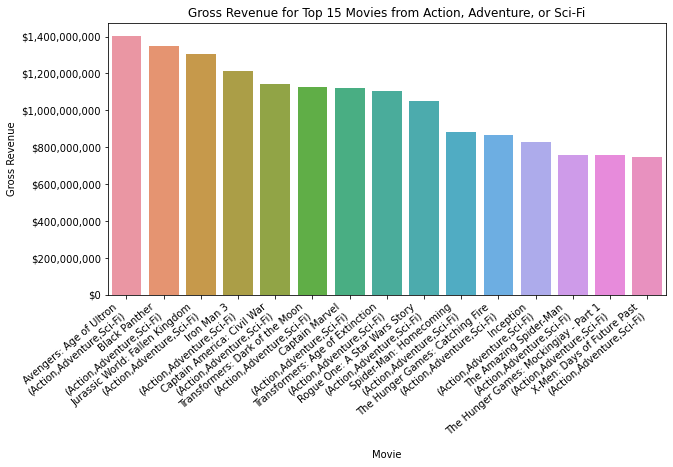

In [70]:
# Calculate and plot gross revenue for top 10 movies from Action, Adventure, or Sci-Fi

merged["title_genres"] = merged["title"]+"\n("+merged["genres"]+")"
chart_data = merged[merged["genres"].isin(genres) == True].sort_values(by = "total_gross", ascending = False)[:15]

bplot("title_genres", "total_gross", "Gross Revenue for Top 15 Movies from Action, Adventure, or Sci-Fi", "Movie", "Gross Revenue")

The next step is to identify which actors/actresses are associated with higher gross revenue. The chart below demonstrates that Chris Hemsworth ("Avengers: Age of Ultron", "Avengers: Infinity War", etc.), Mark Ruffalo ("Avengers: Age of Ultron", "Thor: Ragnarok", etc.), and Robert Downey Jr. ("Avengers: Age of Ultron", "Iron Man 3", etc.) are the top 3 actors. Here, I excluded actors/actresses who acted in only one movie with high gross revenue because it is unclear if the actor/actress contributed to the movie's success, or it was because of luck.

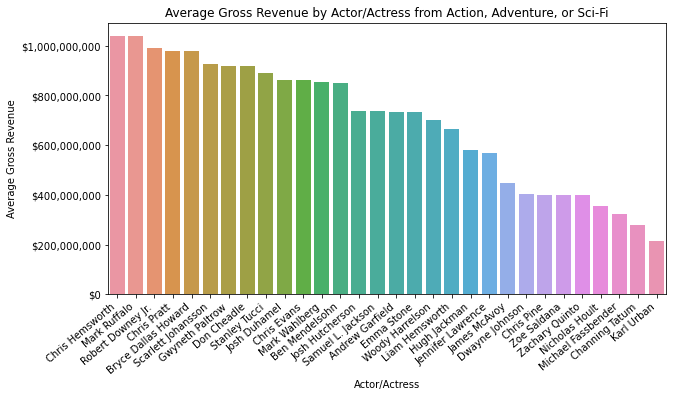

In [41]:
# Identify actors/actresses from Action, Adeventure, or Sci-Fi who acted in more than one movie
# Calculate and plot average gross revenue by actor/actress

merged2a = merged2[(merged2["category"].str.startswith("act") == True) & (merged2["genres"].isin(genres) == True)]
actors = merged2a.groupby("primary_name")["primary_name"].count()
actors_with_mult_movies = actors[actors>1].keys()
merged2a = merged2a[merged2a["primary_name"].isin(actors_with_mult_movies)]
chart_data = merged2a.groupby(["primary_name", "category"])["total_gross"].mean().sort_values(ascending = False)[:30].reset_index()

bplot("primary_name", "total_gross", "Average Gross Revenue by Actor/Actress from Action, Adventure, or Sci-Fi", "Actor/Actress", "Average Gross Revenue")

I also identified which directors are associated with higher gross revenue. The chart below demonstrates that Michael Bay ("Transformers: Dark of the Moon", "Transformers: Age of Extinction", etc.), Joe Russo ("Captain America: Civil War", "Captain America: The Winter Soldier", etc.), and Anthony Russo ("Captain America: Civil War", "Captain America: The Winter Soldier", etc.) are the top 3 directors. Here, I excluded directors who directed only one movie with high gross revenue because it is unclear if the director contributed to the movie's success, or it was because of luck.

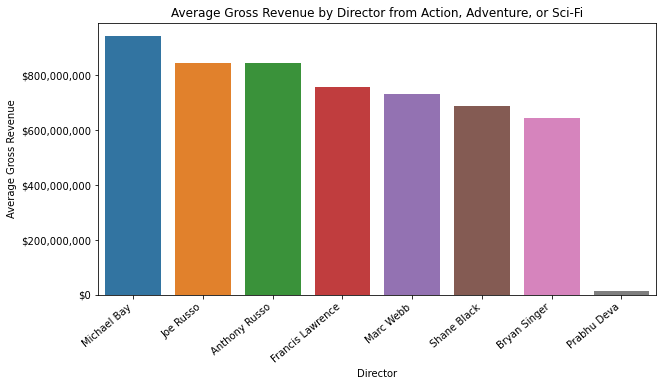

In [53]:
# Identify directors from Action, Adeventure, or Sci-Fi who directed more than one movie
# Calculate and plot average gross revenue by director

merged2b = merged2[(merged2["category"].str.startswith("director") == True) & (merged2["genres"].isin(genres) == True)]
directors = merged2b.groupby("primary_name")["primary_name"].count()
directors_with_mult_movies = directors[directors>1].keys()
merged2b = merged2b[merged2b["primary_name"].isin(directors_with_mult_movies)]
chart_data = merged2b.groupby(["primary_name", "category"])["total_gross"].mean().sort_values(ascending = False)[:30].reset_index()

bplot("primary_name", "total_gross", "Average Gross Revenue by Director from Action, Adventure, or Sci-Fi", "Director", "Average Gross Revenue")

Lastly, I plotted the movie runtime and gross revenue in all genres. It can be generally seen that successful movies are not under 75 minutes and over 175 minutes. Therefore, the optimal range of runtime would be 75-175 minutes.

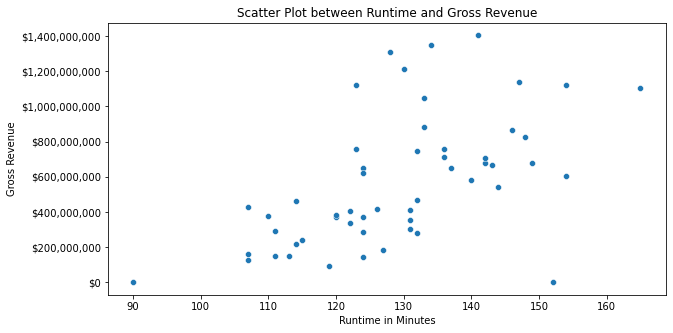

In [72]:
# Plot gross revenue by runtime

fig, ax = plt.subplots(figsize = [10, 5])
sns.scatterplot(x = "runtime_minutes", y = "total_gross", data = merged[merged["genres"] == "Action,Adventure,Sci-Fi"], ax = ax)
ax.yaxis.set_major_formatter('${x:,.0f}')
plt.title("Scatter Plot between Runtime and Gross Revenue")
plt.xlabel("Runtime in Minutes")
plt.ylabel("Gross Revenue")
plt.show()

## Future Improvement Ideas
1. It was not readily verifiable if the genre "Action, Adventure, Sci-Fi" is produced by only a handful of studios or not. If this is the case, it could mean that a small number of studios with appropriate expertise can produce the successful movies, and the barrier entry is high for a new player like Microsoft. Therefore, additional research or a more reliable dataset in this regard can be useful for future improvements.
2. In identifying actors/actresses with high gross revenue, I identified them regardless of whether they are main characters or supporting characters. If we decide to proceed with the genre "Action, Adventure, Sci-Fi", it makese sense to refine the list based on their roles.